# 基于Baostock

In [1]:
import pandas as pd
import baostock as bs
import matplotlib.pyplot as plt
from datetime import datetime

#plt.style.use(['science','no-latex'])

## 1. 登录系统

In [2]:
lg = bs.login()

login success!


## 2. 获取历史K线数据

In [3]:
def get_k(code,start,end,freq='d'):
    rs = bs.query_history_k_data_plus(code,
            "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
            start_date=start, end_date=end,
            frequency=freq, adjustflag="3")
    print('query_history_k_data_plus respond error_code:'+rs.error_code)
    print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)
    data_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    result.index=[datetime.strptime(time,'%Y-%m-%d') for time in result['date']]
    result=result.iloc[:,1:]
    for index in result.keys():
        result[index] = [0 if x == "" else float(x) for x in result["close"]]
    return result

In [4]:
data=get_k('sh.600603','2022-01-01','2022-09-30')

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


In [5]:
data.head()

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
2022-01-04,4.06,4.06,4.06,4.06,4.06,4.06,4.06,4.06,4.06,4.06,4.06,4.06,4.06
2022-01-05,4.04,4.04,4.04,4.04,4.04,4.04,4.04,4.04,4.04,4.04,4.04,4.04,4.04
2022-01-06,4.05,4.05,4.05,4.05,4.05,4.05,4.05,4.05,4.05,4.05,4.05,4.05,4.05
2022-01-07,4.03,4.03,4.03,4.03,4.03,4.03,4.03,4.03,4.03,4.03,4.03,4.03,4.03
2022-01-10,4.08,4.08,4.08,4.08,4.08,4.08,4.08,4.08,4.08,4.08,4.08,4.08,4.08


## 3. 画图

<AxesSubplot:>

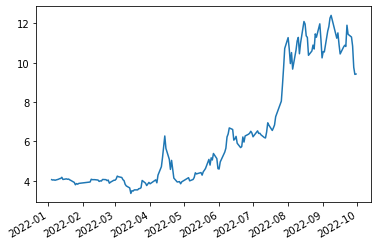

In [6]:
data['close'].plot()

## 4. 登出系统

In [7]:
lg = bs.logout()

logout success!
